## Market analysis for ``Job Ready``, the e-learning company

In this project, we will scout the best market for our ``fictional`` company ``Job Ready`` to advertise in. We will be looking for a market/markets that project the most ROI on advertising. Although we offer a plethora of courses on our platform, we contentrate greatly on ``Web Development`` and ``Mobile Development``.


To help us out, we will be using  freeCodeCamp's 2017 New Coder Survey. freeCodeCamp is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in at https://github.com/freeCodeCamp/2017-new-coder-survey.

So, without further ado, lets get started.Let's import all the relevent libraries first


In [1]:
## importing libraries ##

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Now, lets read the data in and get a sense of all the important bits of the data

In [2]:
## Importing Dataset ##
fcc = pd.read_csv('/Users/arjun/Desktop/goldengate12c/survey.csv', low_memory = False)
pd.options.display.max_rows = 200
pd.options.display.max_columns = 100

fcc.describe()
fcc.columns


Index(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo',
       'BootcampName', 'BootcampRecommend', 'ChildrenNumber', 'CityPopulation',
       'CodeEventConferences', 'CodeEventDjangoGirls',
       ...
       'YouTubeFCC', 'YouTubeFunFunFunction', 'YouTubeGoogleDev',
       'YouTubeLearnCode', 'YouTubeLevelUpTuts', 'YouTubeMIT',
       'YouTubeMozillaHacks', 'YouTubeOther', 'YouTubeSimplilearn',
       'YouTubeTheNewBoston'],
      dtype='object', length=136)

After going though the data, i could think of the following columns being imperative for our anaysis
1. Age
2. AttendedBootcamp
3. BootcampFinish
4. FinanciallySupporting
5. ExpectedEarning	
6. Income
7. HoursLearning
8. IsSoftwareDev
9. IsUnderEmployed
10. CountryLive
11. MonthsProgramming
12. MoneyForLearning
13. JobRoleInterest

We will isolate these columns and make a new dataframe containing only these columns


In [3]:
## Isolating relevent columns for our analysis ##
fcc_new = fcc[['Age','JobRoleInterest','AttendedBootcamp','BootcampFinish','FinanciallySupporting','ExpectedEarning',
                  'Income','HoursLearning','IsSoftwareDev','IsUnderEmployed','CountryLive','MoneyForLearning','MonthsProgramming','Income']].copy()
             

fcc_new.head(10)


,Age,JobRoleInterest,AttendedBootcamp,BootcampFinish,FinanciallySupporting,ExpectedEarning,Income,HoursLearning,IsSoftwareDev,IsUnderEmployed,CountryLive,MoneyForLearning,MonthsProgramming,Income
0,27.0,NaN,0.0,NaN,NaN,NaN,NaN,15.0,0.0,0.0,Canada,150.0,6.0,NaN
1,34.0,Full-Stack Web Developer,0.0,NaN,NaN,35000.0,NaN,10.0,0.0,NaN,United States of America,80.0,6.0,NaN
2,21.0,"Front-End Web Developer, Back-End Web Develo...",0.0,NaN,NaN,70000.0,13000.0,25.0,0.0,0.0,United States of America,1000.0,5.0,13000.0
3,26.0,"Front-End Web Developer, Full-Stack Web Deve...",0.0,NaN,0.0,40000.0,24000.0,14.0,0.0,1.0,Brazil,0.0,5.0,24000.0
4,20.0,"Full-Stack Web Developer, Information Security...",0.0,NaN,NaN,140000.0,NaN,10.0,0.0,NaN,Portugal,0.0,24.0,NaN
5,28.0,NaN,0.0,NaN,NaN,NaN,NaN,12.0,0.0,NaN,Canada,200.0,12.0,NaN
6,29.0,Full-Stack Web Developer,0.0,NaN,NaN,30000.0,40000.0,16.0,0.0,0.0,United Kingdom,0.0,12.0,40000.0
7,29.0,NaN,0.0,NaN,NaN,NaN,NaN,15.0,0.0,NaN,United States of America,0.0,4.0,NaN
8,23.0,NaN,0.0,NaN,NaN,NaN,30000.0,5.0,1.0,0.0,United States of America,700.0,29.0,30000.0
9,24.0,"Full-Stack Web Developer, Quality Assurance ...",0.0,NaN,NaN,100000.0,NaN,2.0,0.0,NaN,Mexico,100.0,18.0,NaN


Lets look into the JobRoleInsterest column to determine what roles are the most popular among our participants.
As mentioned earlier we primarily offer courses on web and mobile dev.



In [4]:
fcc_new['JobRoleInterest'].value_counts(normalize = True).sort_index()*100


  Data Scientist                                                                                                                                                                                          2.173913
  Data Scientist,   DevOps / SysAdmin                                                                                                                                                                     0.014302
  Data Scientist,   DevOps / SysAdmin,   Front-End Web Developer, Full-Stack Web Developer, Data Engineer                                                                                                 0.014302
  Data Scientist,   DevOps / SysAdmin,   Mobile Developer,   Front-End Web Developer,   Quality Assurance Engineer, Information Security,   Product Manager,   User Experience Designer, Data Engineer    0.014302
  Data Scientist,   DevOps / SysAdmin,   Product Manager                                                                                                    

Looking at the data above, we could arrive at the following findings

1. A lot of people are interested in Web dev
2. Some people are interested in Mobil Dev
3. Only a handful of people are interests in other roles.

But the data above is vast and it is difficult to precisely find the most popular role/roles.
So, In order to acheive higher precision, we will filter out all the null values and split the data in the JobRoleInterest column.


In [5]:
job_interests_no_null = fcc_new['JobRoleInterest'].dropna()

split_interest = job_interests_no_null.str.split(',')

split_interest = split_interest.sort_values()

no_of_options = split_interest.apply(lambda x : len(x))

no_of_options.value_counts(normalize = True).sort_index()*100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

Per the data above, only 31% of the people know of their area of interest and the rest seem to be confused between multiple options.

Our primary couse offerings are web and mobile development,we will isolate the data pertaining to web and mobile development.



Text(0, 0.5, 'Percentage')

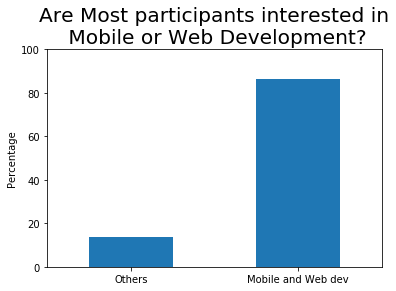

In [6]:
mobile_web = job_interests_no_null.str.contains('Web Developer|Mobile Developer')

freq_table = mobile_web.value_counts(normalize = True).sort_index()*100

freq_table.plot(kind='bar')
plt.style.use('fivethirtyeight')
plt.title('Are Most participants interested in\n Mobile or Web Development?')
plt.xticks([0,1],['Others','Mobile and Web dev'], rotation = 0)
plt.ylim([0,100])
plt.ylabel('Percentage')

Turns out most of the people or roughly ``86%`` in the survey are interested in Mobile and Web Dev. So we can positively say that the sample we possess is representative of the population of our interests.




## Finding out where new coders are located ##

Now that we have firmly established that the sample we have is representative of the population of interest. We will located the country/countries where most of our participants are located in.

To achieve this, we will first draw up a frequency table for the countries.

In [7]:
fcc_good = fcc_new[fcc_new['JobRoleInterest'].notnull()].copy()


absolute_freq = fcc_good['CountryLive'].value_counts().sort_index()

relative_freq = fcc_good['CountryLive'].value_counts(normalize = True).sort_index()*100

absolute_freq = absolute_freq.sort_values(ascending = False)
relative_freq = relative_freq.sort_values(ascending = False)

print(absolute_freq)

United States of America         3125
India                             528
United Kingdom                    315
Canada                            260
Poland                            131
Brazil                            129
Germany                           125
Australia                         112
Russia                            102
Ukraine                            89
Nigeria                            84
Spain                              77
France                             75
Romania                            71
Netherlands (Holland, Europe)      65
Italy                              62
Philippines                        52
Serbia                             52
Greece                             46
Ireland                            43
South Africa                       39
Mexico                             37
Turkey                             36
Singapore                          34
Hungary                            34
New Zealand                        33
Argentina   

Gaining any insights from the above table seems difficult, so we will create a nice dataframe from the frequency tables mentioned above.

In [8]:
fcc_country = pd.DataFrame({'Frequency' : absolute_freq,
                            'Percentage' : relative_freq})

fcc_country.head(10)

fcc_good.head(40)

,Age,JobRoleInterest,AttendedBootcamp,BootcampFinish,FinanciallySupporting,ExpectedEarning,Income,HoursLearning,IsSoftwareDev,IsUnderEmployed,CountryLive,MoneyForLearning,MonthsProgramming,Income
1,34.0,Full-Stack Web Developer,0.0,NaN,NaN,35000.0,NaN,10.0,0.0,NaN,United States of America,80.0,6.0,NaN
2,21.0,"Front-End Web Developer, Back-End Web Develo...",0.0,NaN,NaN,70000.0,13000.0,25.0,0.0,0.0,United States of America,1000.0,5.0,13000.0
3,26.0,"Front-End Web Developer, Full-Stack Web Deve...",0.0,NaN,0.0,40000.0,24000.0,14.0,0.0,1.0,Brazil,0.0,5.0,24000.0
4,20.0,"Full-Stack Web Developer, Information Security...",0.0,NaN,NaN,140000.0,NaN,10.0,0.0,NaN,Portugal,0.0,24.0,NaN
6,29.0,Full-Stack Web Developer,0.0,NaN,NaN,30000.0,40000.0,16.0,0.0,0.0,United Kingdom,0.0,12.0,40000.0
9,24.0,"Full-Stack Web Developer, Quality Assurance ...",0.0,NaN,NaN,100000.0,NaN,2.0,0.0,NaN,Mexico,100.0,18.0,NaN
11,22.0,"DevOps / SysAdmin, Data Scientist, Informa...",0.0,NaN,NaN,40000.0,NaN,50.0,0.0,NaN,Germany,0.0,1.0,NaN
13,44.0,"Back-End Web Developer, Full-Stack Web Develop...",0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,United States of America,NaN,NaN,NaN
14,27.0,Full-Stack Web Developer,1.0,1.0,NaN,60000.0,NaN,40.0,0.0,1.0,United States of America,NaN,9.0,NaN
15,32.0,Full-Stack Web Developer,0.0,NaN,NaN,40000.0,20000.0,1.0,0.0,1.0,United States of America,0.0,1.0,20000.0


Unsuprisingly the US takes the cake with ``45%`` of the people in the survey currently residing in the US. But let's dig a little deeper and find the amount of money spent by the people in the survey

Now, we will create a new column which defines the amount of money spent by each person per month.lets call this column ``money_spent_per_month``.


We'll need to divide the ``MoneyForLearning`` column to the ``MonthsProgramming`` column to form the ``money_spent_per_month`` column. But before we do that, we should replace all the values of 0 with 1 in the ``MonthsProgramming`` to avoid dividing by 0 as some of the students answered that they have been learning to code for 0 months


In [9]:
fcc_good['MonthsProgramming'].replace(0,1, inplace = True)


fcc_good['money_spent_per_month'] = fcc_good['MoneyForLearning'] / fcc_good['MonthsProgramming']

fcc_good['money_spent_per_month'].isnull().sum()

/Users/arjun/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


863

Lets only keep the non-null values for the ``money_spent_per_month`` column.

In [10]:
fcc_good = fcc_good[fcc_good['money_spent_per_month'].notnull()]

fcc_good = fcc_good[fcc_good['money_spent_per_month'] < 100000]

fcc_good['money_spent_per_month'].isnull().sum()


0

In [11]:
fcc_good = fcc_good[fcc_good['CountryLive'].notnull()]

fcc_good['CountryLive'].value_counts().head()


United States of America    2810
India                        454
United Kingdom               270
Canada                       235
Poland                       118
Name: CountryLive, dtype: int64

Let's spent the average money spent in the following countries

1. United States of America
2. India
3. United Kingdom
4. Canada


In [12]:
countries_mean = fcc_good.groupby(['CountryLive']).mean()

countries_mean['money_spent_per_month'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]



CountryLive
United States of America    232.771574
India                       136.347477
United Kingdom               46.904110
Canada                      107.415450
Name: money_spent_per_month, dtype: float64

Suprisingly India came in second after the US.The GDB per capita of india is 2010$ whereas the GDP per capita of canada is 46234$ and that of UK 42,962$.So, you'd expect countries like the UK,canada to be higher than india on the charts

One reason could be the presence of outliers in the CountryLive column for India. We will dig deeper into each country to find if ouliers are present and eliminate them accordingly.


## Dealing with extreme outliers ##

Lets, isolate data pertaining to only the 4 countries from the output above and generated a boxplot to help understand the outliers for each country




Text(0.5, 0, 'Country')

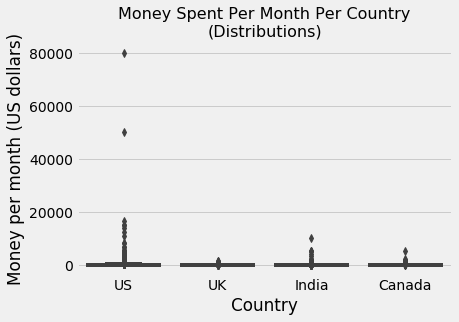

In [13]:
top_4 = fcc_good[fcc_good['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]

sns.boxplot(x = 'CountryLive', y = 'money_spent_per_month', data = top_4)

plt.xticks(range(4),['US','UK','India','Canada'])

plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')


Right away, we can observe that the US has some extreme outliers. But we can't determine the outliers of the other nations.
Lets work on that now

In [14]:
fcc_good = fcc_good[fcc_good['money_spent_per_month'] < 20000]


In [15]:
countries_mean = fcc_good.groupby(['CountryLive']).mean()

countries_mean['money_spent_per_month'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    186.641069
India                       136.347477
United Kingdom               46.904110
Canada                      107.415450
Name: money_spent_per_month, dtype: float64

Text(0.5, 0, 'Country')

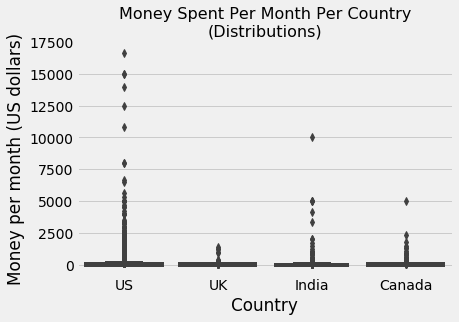

In [16]:
top_4 = fcc_good[fcc_good['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]

sns.boxplot(x = 'CountryLive', y = 'money_spent_per_month', data = top_4)

plt.xticks(range(4),['US','UK','India','Canada'])

plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')



We can see that there are some outliers in india(over 2000$ spent per month). Lets inspecc them further.

In [17]:
india_outliers = top_4[(top_4['CountryLive'] == 'India') &
                        (top_4['money_spent_per_month'] > 2000)]

india_outliers

,Age,JobRoleInterest,AttendedBootcamp,BootcampFinish,FinanciallySupporting,ExpectedEarning,Income,HoursLearning,IsSoftwareDev,IsUnderEmployed,CountryLive,MoneyForLearning,MonthsProgramming,Income,money_spent_per_month
1728,24.0,"User Experience Designer, Mobile Developer...",0.0,NaN,NaN,70000.0,NaN,30.0,0.0,NaN,India,20000.0,4.0,NaN,5000.000000
1755,20.0,"Information Security, Full-Stack Web Developer...",0.0,NaN,NaN,100000.0,NaN,10.0,0.0,NaN,India,50000.0,15.0,NaN,3333.333333
7989,28.0,"User Experience Designer, Back-End Web Devel...",0.0,NaN,1.0,500000.0,300000.0,20.0,0.0,0.0,India,5000.0,1.0,300000.0,5000.000000
8126,22.0,"Back-End Web Developer, Full-Stack Web Develop...",0.0,NaN,NaN,80000.0,NaN,80.0,0.0,NaN,India,5000.0,1.0,NaN,5000.000000
13398,19.0,Mobile Developer,0.0,NaN,NaN,100000.0,NaN,30.0,0.0,NaN,India,20000.0,2.0,NaN,10000.000000
15587,27.0,"Full-Stack Web Developer, Data Scientist",0.0,NaN,0.0,65000.0,60000.0,36.0,0.0,1.0,India,100000.0,24.0,60000.0,4166.666667


All the people who spent above 2000$ have not attended a single bootcamp and only spent about 33 hours learning to code. So it is difficult to exactly determine where they spent their money.

Although it is completely upto the individual to work with these values, i choose to drop them as these outliers affect the overall output

In [18]:
top_4 = top_4.drop(india_outliers.index)

Now if we take a look back at the boxplot, you will see that the US has a bunch of outliers as well. lets examine them.

In [19]:
us_outliers = top_4[(top_4['CountryLive'] == 'United States of America') &
                        (top_4['money_spent_per_month'] > 6000)]

top_4 = top_4.drop(us_outliers.index)

,Age,JobRoleInterest,AttendedBootcamp,BootcampFinish,FinanciallySupporting,ExpectedEarning,Income,HoursLearning,IsSoftwareDev,IsUnderEmployed,CountryLive,MoneyForLearning,MonthsProgramming,Income,money_spent_per_month
1,34.0,Full-Stack Web Developer,0.0,NaN,NaN,35000.0,NaN,10.0,0.0,NaN,United States of America,80.0,6.0,NaN,13.333333
2,21.0,"Front-End Web Developer, Back-End Web Develo...",0.0,NaN,NaN,70000.0,13000.0,25.0,0.0,0.0,United States of America,1000.0,5.0,13000.0,200.000000
6,29.0,Full-Stack Web Developer,0.0,NaN,NaN,30000.0,40000.0,16.0,0.0,0.0,United Kingdom,0.0,12.0,40000.0,0.000000
15,32.0,Full-Stack Web Developer,0.0,NaN,NaN,40000.0,20000.0,1.0,0.0,1.0,United States of America,0.0,1.0,20000.0,0.000000
16,29.0,Full-Stack Web Developer,0.0,NaN,NaN,60000.0,60000.0,6.0,0.0,0.0,United States of America,200.0,12.0,60000.0,16.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18107,35.0,Full-Stack Web Developer,0.0,NaN,1.0,10000.0,60000.0,30.0,0.0,1.0,India,550.0,2.0,60000.0,275.000000
18111,30.0,"Mobile Developer, Game Developer",0.0,NaN,0.0,50000.0,60000.0,40.0,0.0,1.0,India,1000.0,5.0,60000.0,200.000000
18113,24.0,"Mobile Developer, Game Developer",0.0,NaN,0.0,24000.0,60000.0,2.0,0.0,1.0,United States of America,0.0,1.0,60000.0,0.000000
18130,23.0,"Front-End Web Developer, User Experience D...",0.0,NaN,0.0,70000.0,60000.0,10.0,0.0,0.0,United States of America,0.0,8.0,60000.0,0.000000


Unlike India, some of them have actually attended bootcamp in the US,so it makes sense to only include outliers that have attended a bootcamp.

Lets only include the people who have attend bootcamp and has been coding for atleast 3 months


In [21]:
no_bootcamp = top_4[(top_4['CountryLive'] == 'United States of America') &
                        (top_4['money_spent_per_month'] >= 6000) &
                         (top_4['AttendedBootcamp'] == 0)]

less_3_exp = top_4[(top_4['CountryLive'] == 'United States of America') &
                        (top_4['money_spent_per_month'] >= 6000) &
                         (top_4['MonthsProgramming'] <= 3)]

top_4 = top_4.drop(no_bootcamp.index)
top_4 = top_4.drop(less_3_exp.index)

Looking at the boxplot, canada seem have a single outlier. A person who spent approx 5000$ per month

lets look into it

In [23]:
canada_outliers = top_4[(top_4['CountryLive'] == 'Canada') &
                        (top_4['money_spent_per_month'] >= 5000)]

canada_outliers

,Age,JobRoleInterest,AttendedBootcamp,BootcampFinish,FinanciallySupporting,ExpectedEarning,Income,HoursLearning,IsSoftwareDev,IsUnderEmployed,CountryLive,MoneyForLearning,MonthsProgramming,Income,money_spent_per_month
13659,24.0,"Mobile Developer, Full-Stack Web Developer, ...",1.0,0.0,NaN,60000.0,140000.0,10.0,0.0,0.0,Canada,10000.0,2.0,140000.0,5000.0


The person in canada seem to have attended a bootcamp but has less than two months of coding under his belt.
So it makes sense to exclude this person from our analysis

In [24]:
top_4 = top_4.drop(canada_outliers.index)

In [25]:
top_4.groupby('CountryLive').mean()['money_spent_per_month']

CountryLive
Canada                       86.506969
India                        65.628917
United Kingdom               46.904110
United States of America    146.862564
Name: money_spent_per_month, dtype: float64

Text(0.5, 0, 'Country')

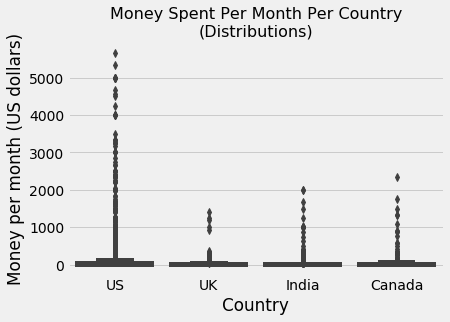

In [26]:
sns.boxplot(x = 'CountryLive', y = 'money_spent_per_month', data = top_4)

plt.xticks(range(4),['US','UK','India','Canada'])

plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')

